In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [14]:
df = pd.read_csv('Output/NEES_summary_with_heliquest.csv')

In [15]:
df.head()

,AA_seq,AH,Median,Mean,Organelle,Median_Response,phil_A,phob_A,phil_G,phob_G,...,phob_E,phil_H,phob_H,phil_P,phob_P,Length,Hydrophobicity,H_moment,Netcharge,Dfactor
0,EHPIQWLYITCRKVCKG,nemp1,0.4880,0.495500,4,No Response,0.00,0.00,0.00,0.11,...,0.00,0.11,0.0,0.0,0.11,17.0,0.592,0.372806,2.0,1.012
1,VSEFMTRLFS,emc7,0.8205,0.814200,1,High,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.00,10.0,0.626,0.614353,0.0,0.580
2,RGLWEKCQEYLRKINRDIAQLLTH,scai,1.0900,1.098238,3,Very High,0.08,0.00,0.08,0.00,...,0.00,0.08,0.0,0.0,0.00,24.0,0.323,0.630841,2.0,1.256
3,IMERIMDLPTLLRHAFREVFSV,rnf170,1.7580,1.734862,3,Very High,0.00,0.10,0.00,0.00,...,0.00,0.10,0.0,0.0,0.10,22.0,0.613,0.516127,0.0,0.487
4,QADILGALKHLRKELQSLRNRK,tmem260,0.4440,0.457000,4,No Response,0.09,0.09,0.09,0.00,...,0.09,0.09,0.0,0.0,0.00,22.0,0.116,0.363887,4.0,1.664


### NEES-strength-category-based machine learning

In [16]:
# define features
data = df.copy()
features = data.columns[6:-5]
print(features)
x = data.loc[:, features].values
y = data.loc[:, 'Median_Response'].values
x = StandardScaler().fit_transform(x)

Index(['phil_A', 'phob_A', 'phil_G', 'phob_G', 'phil_V', 'phob_V', 'phil_L',
       'phob_L', 'phil_I', 'phob_I', 'phil_F', 'phob_F', 'phil_W', 'phob_W',
       'phil_M', 'phob_M', 'phil_Y', 'phob_Y', 'phil_C', 'phob_C', 'phil_S',
       'phob_S', 'phil_T', 'phob_T', 'phil_R', 'phob_R', 'phil_K', 'phob_K',
       'phil_N', 'phob_N', 'phil_Q', 'phob_Q', 'phil_D', 'phob_D', 'phil_E',
       'phob_E', 'phil_H', 'phob_H', 'phil_P', 'phob_P'],
      dtype='object')


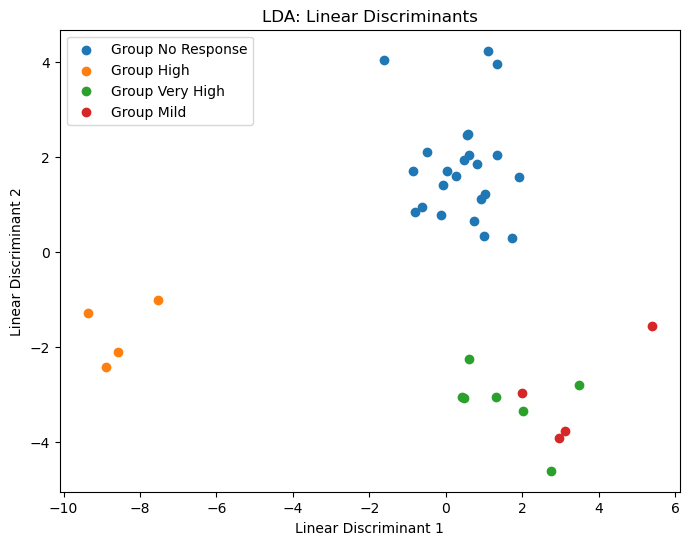

In [17]:
# Perform LDA
lda = LinearDiscriminantAnalysis(n_components=2)
lda_components = lda.fit_transform(x, y)
lda_df = pd.DataFrame(data=lda_components, columns=['Linear Discriminant 1', 'Linear Discriminant 2'])
lda_df['Group'] = y

# Plot LDA results
plt.figure(figsize=(8, 6))
for group in lda_df['Group'].unique():
    indices = lda_df['Group'] == group
    plt.scatter(lda_df.loc[indices, 'Linear Discriminant 1'],
                lda_df.loc[indices, 'Linear Discriminant 2'],
                label=f'Group {group}')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.title('LDA: Linear Discriminants')
plt.legend()
plt.show()

### Organelle-type-based machine learning

In [4]:
# Remove rows where 'Organelle' is 5
data_filtered = df[df['Organelle'] != 5]

# Combine categories 1 and 2 into a single category "1"
data_combined = data_filtered.copy()
data_combined['Organelle'] = data_combined['Organelle'].replace({2: 1})

In [5]:
# define features
data = data_combined.copy()
features = data.columns[5:-5]
print(features)
x = data.loc[:, features].values
y = data.loc[:, 'Organelle'].values
x = StandardScaler().fit_transform(x)

Index(['phil_A', 'phob_A', 'phil_G', 'phob_G', 'phil_V', 'phob_V', 'phil_L',
       'phob_L', 'phil_I', 'phob_I', 'phil_F', 'phob_F', 'phil_W', 'phob_W',
       'phil_M', 'phob_M', 'phil_Y', 'phob_Y', 'phil_C', 'phob_C', 'phil_S',
       'phob_S', 'phil_T', 'phob_T', 'phil_R', 'phob_R', 'phil_K', 'phob_K',
       'phil_N', 'phob_N', 'phil_Q', 'phob_Q', 'phil_D', 'phob_D', 'phil_E',
       'phob_E', 'phil_H', 'phob_H', 'phil_P', 'phob_P'],
      dtype='object')


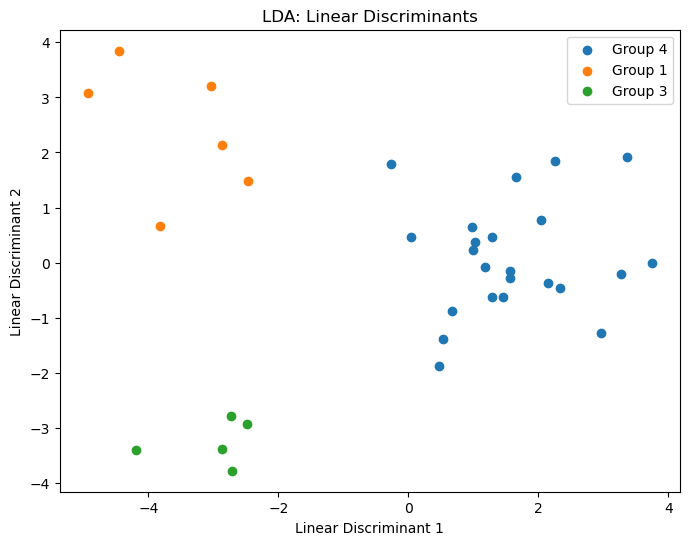

In [6]:
# Perform LDA
lda = LinearDiscriminantAnalysis(n_components=2)
lda_components = lda.fit_transform(x, y)
lda_df = pd.DataFrame(data=lda_components, columns=['Linear Discriminant 1', 'Linear Discriminant 2'])
lda_df['Group'] = y

# Plot LDA results
plt.figure(figsize=(8, 6))
for group in lda_df['Group'].unique():
    indices = lda_df['Group'] == group
    plt.scatter(lda_df.loc[indices, 'Linear Discriminant 1'],
                lda_df.loc[indices, 'Linear Discriminant 2'],
                label=f'Group {group}')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.title('LDA: Linear Discriminants')
plt.legend()
plt.show()